In [ ]:
#Dataset Regresión Logística – Heart Disease Cleveland UCI: 
#https://www.kaggle.com/datasets/cherngs/heart-diseasecleveland-uci
#Contiene información de pacientes como edad, sexo, presión 
#sanguínea, colesterol, etc. la variable objetivo es la presencia 
#de enfermedad cardíaca.

In [ ]:
#1.Realizar un análisis exploratorio de los datos para identificar 
#relaciones entre variables, valores atípicos, tendencias, etc. 

In [ ]:
#Importación de librerias

In [12]:
import pandas as pd   # Manejo y análisis de estructuras de datos
import numpy as np    # Cálculo númerico y análisis de datos
import seaborn as sns # Creación de graficos estadísticos
import matplotlib.pyplot as plt # creación de gràficos en dos dimensiones 

# Librerías para implementar modelos de ciencia de datos

In [14]:
from sklearn import metrics   # Métricas para evaluar el rendimiento del modelo
from sklearn.model_selection import train_test_split #Función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression # Implementación del algoritmo de regresión logística
from sklearn.metrics import classification_report, confusion_matrix #Herramientas para evaluar el rendimiento del modelo de clasificación
from sklearn.preprocessing import StandardScaler # Para preprocesamiento de datos
from sklearn.model_selection import cross_val_score # Para validación cruzada
from sklearn.model_selection import GridSearchCV # Para ajustar hiperparámetros
from sklearn.metrics import roc_curve, auc # Para calcular la curva ROC y el área bajo la curva (AUC)
from imblearn.over_sampling import SMOTE # Para manejar el desbalance de clases (si es necesario)

In [16]:
import pandas as pd

# Lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [18]:
# Realizamos lectura de los Datos para el análisis exploratorio, se cargan 50 de los 297 registros

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [20]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

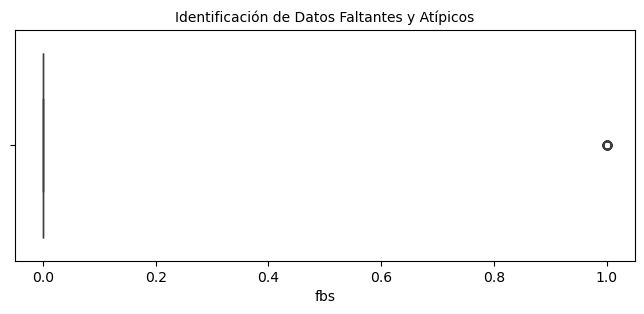

In [33]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

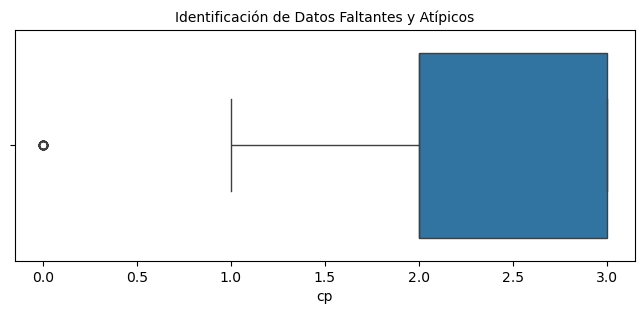

In [17]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

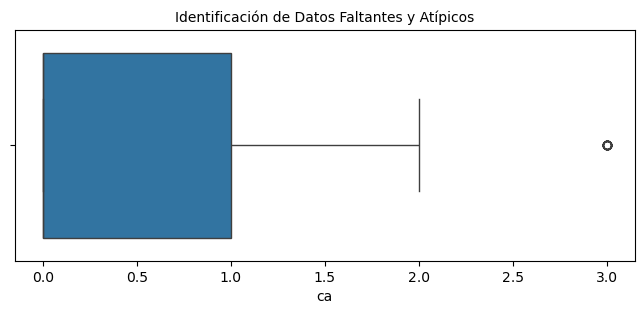

In [19]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

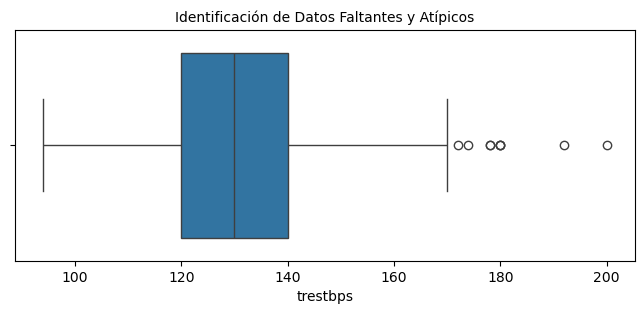

In [21]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

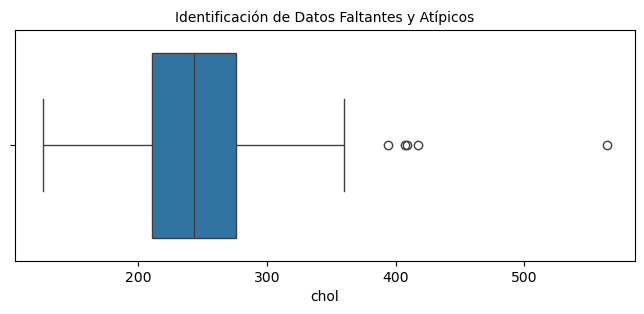

In [23]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

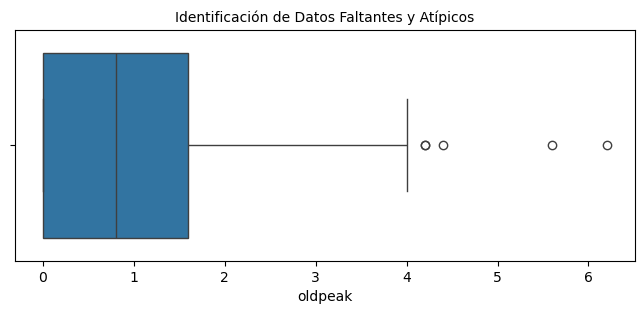

In [25]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

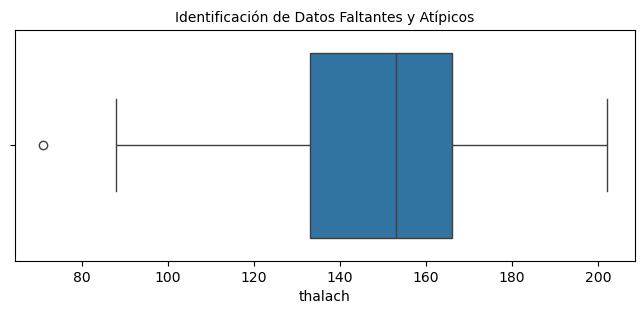

In [27]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [22]:
# Verificar datos faltantes para cada variable:

for column in Datos.columns:
    missing_count = Datos[column].isnull().sum()
    print(f"Cantidad de registros faltantes en '{column}': {missing_count}")

Cantidad de registros faltantes en 'age': 0
Cantidad de registros faltantes en 'sex': 0
Cantidad de registros faltantes en 'cp': 0
Cantidad de registros faltantes en 'trestbps': 0
Cantidad de registros faltantes en 'chol': 0
Cantidad de registros faltantes en 'fbs': 0
Cantidad de registros faltantes en 'restecg': 0
Cantidad de registros faltantes en 'thalach': 0
Cantidad de registros faltantes en 'exang': 0
Cantidad de registros faltantes en 'oldpeak': 0
Cantidad de registros faltantes en 'slope': 0
Cantidad de registros faltantes en 'ca': 0
Cantidad de registros faltantes en 'thal': 0
Cantidad de registros faltantes en 'condition': 0


In [43]:
#Verificar si hay valores que no sean binarios (0 o 1) para variables que deberían serlo (como sex, fbs, exang, etc.):
# Para esta secuencia se descarta la variable restecg ya que se definio asi: 0: Normal,1: Teniendo una anomalía en la onda ST-T, 2.Mostrando hipertrofia ventricular izquierda probable o definitiva
variables_binarias = ['sex', 'fbs', 'exang', 'restecg', 'condition']

for var in variables_binarias:
    valores_invalidos = Datos[~Datos[var].isin([0, 1])]
    print(f"Cantidad de registros con valores inválidos en '{var}': {len(valores_invalidos)}")

Cantidad de registros con valores inválidos en 'sex': 0
Cantidad de registros con valores inválidos en 'fbs': 0
Cantidad de registros con valores inválidos en 'exang': 0
Cantidad de registros con valores inválidos en 'restecg': 146
Cantidad de registros con valores inválidos en 'condition': 0


In [45]:
#Contar cuántos registros tienen 0 y cuántos tienen 1 en cada variable binaria:

for var in variables_binarias:
    cantidad_cero = (Datos[var] == 0).sum()
    cantidad_uno = (Datos[var] == 1).sum()
    print(f"En '{var}': {cantidad_cero} registros con 0 y {cantidad_uno} registros con 1.")

En 'sex': 96 registros con 0 y 201 registros con 1.
En 'fbs': 254 registros con 0 y 43 registros con 1.
En 'exang': 200 registros con 0 y 97 registros con 1.
En 'restecg': 147 registros con 0 y 4 registros con 1.
En 'condition': 160 registros con 0 y 137 registros con 1.


In [47]:
#Verificar si hay valores atípicos (outliers) en las variables numéricas:

variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in variables_numericas:
    Q1 = Datos[var].quantile(0.25)
    Q3 = Datos[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = Datos[(Datos[var] < (Q1 - 1.5 * IQR)) | (Datos[var] > (Q3 + 1.5 * IQR))]
    print(f"Cantidad de valores atípicos en '{var}': {len(outliers)}")

Cantidad de valores atípicos en 'age': 0
Cantidad de valores atípicos en 'trestbps': 9
Cantidad de valores atípicos en 'chol': 5
Cantidad de valores atípicos en 'thalach': 1
Cantidad de valores atípicos en 'oldpeak': 5


In [51]:
#Eliminar valores atípicos utilizando el rango intercuartil (IQR):

variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for var in variables_numericas:
    Q1 = Datos[var].quantile(0.25)
    Q3 = Datos[var].quantile(0.75)
    IQR = Q3 - Q1
    # Filtrar y mantener solo los valores dentro del rango intercuartil
    Datos = Datos[(Datos[var] >= (Q1 - 1.5 * IQR)) & (Datos[var] <= (Q3 + 1.5 * IQR))]

print("Datos limpios de valores atípicos.")


Datos limpios de valores atípicos.


In [53]:
print(f"Cantidad de registros después de limpiar outliers: {len(Datos)}")

Cantidad de registros después de limpiar outliers: 278


#Contar los valores atípicos  después de la limpieza:


In [57]:
def contar_outliers(df, variables):
    outliers_totales = {}
    for var in variables:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        # Contar los valores que están fuera del rango IQR
        outliers = df[(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))]
        outliers_totales[var] = len(outliers)
    return outliers_totales

# Definir las variables numéricas
variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Contar outliers en el dataset limpio
outliers_limpios = contar_outliers(Datos, variables_numericas)
print("Cantidad de outliers en el dataset limpio:", outliers_limpios)

Cantidad de outliers en el dataset limpio: {'age': 0, 'trestbps': 0, 'chol': 0, 'thalach': 0, 'oldpeak': 0}


In [59]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        278 non-null    int64  
 1   sex        278 non-null    int64  
 2   cp         278 non-null    int64  
 3   trestbps   278 non-null    int64  
 4   chol       278 non-null    int64  
 5   fbs        278 non-null    int64  
 6   restecg    278 non-null    int64  
 7   thalach    278 non-null    int64  
 8   exang      278 non-null    int64  
 9   oldpeak    278 non-null    float64
 10  slope      278 non-null    int64  
 11  ca         278 non-null    int64  
 12  thal       278 non-null    int64  
 13  condition  278 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

In [73]:
# Ver los valores únicos en la columna 'condition'
# Total de personas con condición a riesgo cardiaco
total_condition = Datos['condition'].value_counts()
print("Total de personas con condición a riesgo cardiaco:")
print(total_condition)
print("")

# Mostrar las primeras 50 filas de la columna 'condition'
print(Datos[['condition']].head(50))

Total de personas con condición a riesgo cardiaco:
condition
0    154
1    124
Name: count, dtype: int64

    condition
0           0
1           0
2           0
3           1
4           0
5           0
6           0
7           1
8           0
10          1
11          1
12          1
13          0
14          0
15          0
16          0
17          0
18          1
19          0
20          0
21          1
22          0
23          0
24          0
25          0
26          1
27          0
28          1
29          0
30          0
31          1
32          1
33          1
34          1
35          1
36          0
37          0
38          0
39          0
40          0
41          0
42          0
43          0
44          0
46          0
47          0
48          0
49          0
50          0
51          0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [24]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [26]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [28]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [30]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [32]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [34]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [36]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

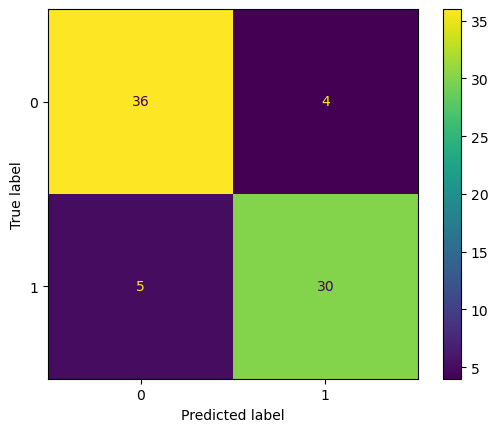

In [38]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

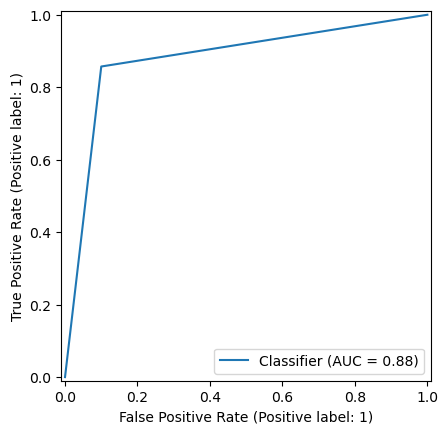

In [40]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

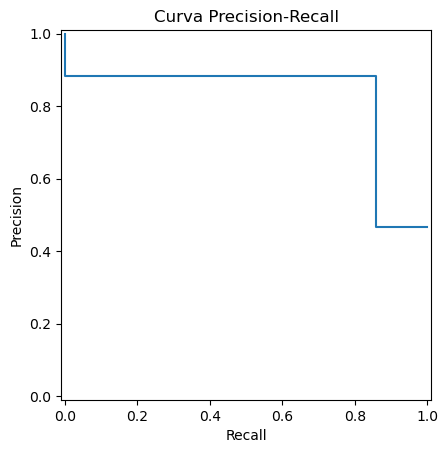

In [44]:
# Curva Precision-Recall

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(Y_test, Prediccion)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Curva Precision-Recall')
plt.show()

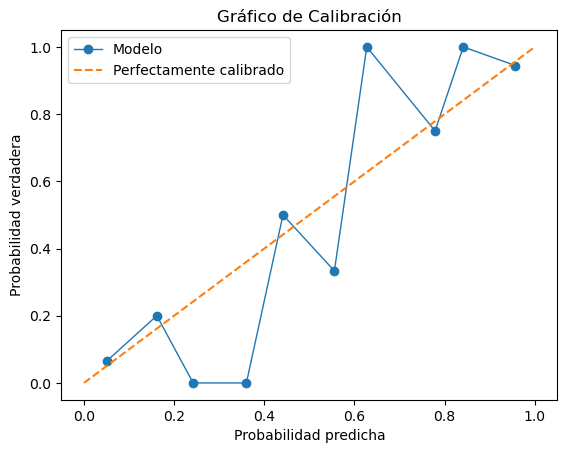

In [54]:
#Gráfico de calibración del modelo

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calcular la curva de calibración (probabilidades reales vs predichas)
prob_true, prob_pred = calibration_curve(Y_test, modelo_regresion.predict_proba(X_test)[:, 1], n_bins=10)

# Graficar la curva de calibración
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Modelo')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Probabilidad verdadera')
plt.title('Gráfico de Calibración')
plt.legend()
plt.show()

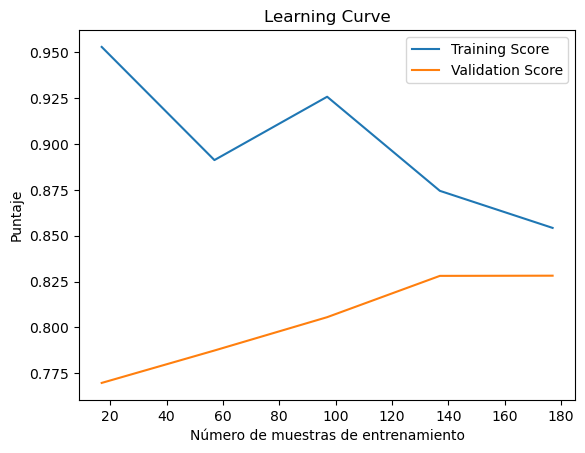

In [61]:
# Learning Curve (Curva de aprendizaje)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(modelo_regresion, X_train, Y_train, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Puntaje')
plt.title('Learning Curve')
plt.legend()
plt.show()

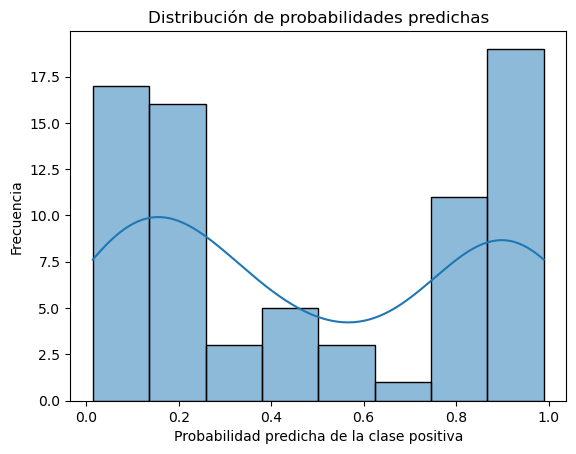

In [63]:
#Gráfico de clasificación en función de la probabilidad

import seaborn as sns
sns.histplot(modelo_regresion.predict_proba(X_test)[:, 1], kde=True)
plt.title('Distribución de probabilidades predichas')
plt.xlabel('Probabilidad predicha de la clase positiva')
plt.ylabel('Frecuencia')
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Precisión (Precisión):
Clase 0: 0.88, lo que significa que el 88% de las predicciones de la clase "sin enfermedad" fueron correctas (es decir, personas sin enfermedad cardíaca realmente no la tienen).
Clase 1: 0.88, lo que implica que el 88% de las personas predichas como "con enfermedad" efectivamente tienen la enfermedad cardíaca.
Interpretación: En este caso, ambas clases tienen una precisión alta y similar, lo que indica que el modelo es consistente a la hora de minimizar los falsos positivos para ambas clases.

Recall (Sensibilidad):
Clase 0: 0.90, lo que significa que el 90% de las personas sin enfermedad fueron correctamente identificadas por el modelo.
Clase 1: 0.86, lo que significa que el 86% de las personas con enfermedad cardíaca fueron correctamente identificadas.
Interpretación: El recall de la clase 0 es ligeramente superior al de la clase 1, lo que sugiere que el modelo tiene una ligera tendencia a ser mejor para identificar personas sin enfermedad que para identificar personas con la enfermedad. Sin embargo, el recall en ambas clases es bastante alto.

F1-Score:
Clase 0: 0.89, lo que refleja un buen equilibrio entre precisión y recall para la clase "sin enfermedad".
Clase 1: 0.87, lo que también indica un buen equilibrio entre precisión y recall para la clase "con enfermedad".
Interpretación: El F1-Score muestra que el modelo es bastante robusto para ambas clases, lo que significa que maneja bien la identificación tanto de personas con como sin enfermedad.
Las métricas cercanas al 0.88 en todas las categorías y promedios sugieren que el modelo es bastante consistente en su rendimiento.

Valores en la matriz de confusión:

Verdaderos negativos (TN): 36
El modelo predijo correctamente 36 instancias como clase 0 (sin enfermedad cardíaca), y estas realmente pertenecían a esa clase.

Falsos positivos (FP): 4
El modelo predijo incorrectamente 4 instancias como clase 1 (con enfermedad cardíaca), cuando en realidad pertenecían a la clase 0 (sin enfermedad).

Falsos negativos (FN): 5
El modelo predijo incorrectamente 5 instancias como clase 0 (sin enfermedad cardíaca), cuando en realidad pertenecían a la clase 1 (con enfermedad).

Verdaderos positivos (TP): 30
El modelo predijo correctamente 30 instancias como clase 1 (con enfermedad cardíaca).

De la curva de precisión del modelo se puede interpretar:
El AUC es 0,88 lo que significa que el 88 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

Curva Precision Re-call
	Esta curva sugiere que el modelo clasificador tiene un buen rendimiento para un umbral de decisión que resulta en un recall de hasta 0.8, manteniendo una alta precisión. Sin embargo, intentar aumentar el recall más allá de este punto resulta en una disminución significativa de la precisión.

Gráfico de calibración
•	Propósito del gráfico: Compara las probabilidades predichas por el modelo con las probabilidades reales observadas.
•	Línea de referencia: La línea naranja punteada representa la calibración perfecta, donde las probabilidades predichas coinciden exactamente con las probabilidades reales.
•	Curva del modelo: La línea azul con puntos representa el rendimiento real del modelo.
•	Desviaciones de la calibración perfecta:

	En algunos puntos, el modelo está por encima de la línea de calibración perfecta, lo que indica sobreestimación de probabilidades.
	En otros puntos, está por debajo, indicando subestimación.
	Hay fluctuaciones significativas, especi
almente en el rango medio de probabilidades.
•	Rendimiento en los extremos:
Para probabilidades muy bajas y muy altas, el modelo parece estar mejor calibrado,  acerc
ándose más a la línea de calibración perfecta.
•	Inconsistencias notables:
Hay un salto grande alrededor de 0.6 en el eje x, donde la probabilidad real salta de cerca de 0.3 a 1.0.
Hay puntos donde la probabilidad predicha aumenta, pero la 
probabilidad real disminuye, lo cual no es ideal.
•	Calibración general: El modelo muestra una calibración inconsistente a lo largo del rango de probabilidades, con períodos de sobre e infraestimación.
